In [89]:
import numpy as np
import pandas as pd
import seaborn as sns

In [90]:
df=pd.read_csv("placement.csv")

In [91]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [92]:
df=df.drop(df.columns[0],axis=1)

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   cgpa       100 non-null    float64
 1   iq         100 non-null    float64
 2   placement  100 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


In [94]:
df.describe()

,cgpa,iq,placement
count,100.000000,100.000000,100.000000
mean,5.991000,123.580000,0.500000
std,1.143634,39.944198,0.502519
min,3.300000,37.000000,0.000000
25%,5.075000,101.500000,0.000000
50%,6.000000,127.500000,0.500000
75%,6.900000,149.000000,1.000000
max,8.500000,233.000000,1.000000


In [95]:
df.shape

(100, 3)

<AxesSubplot:xlabel='iq', ylabel='cgpa'>

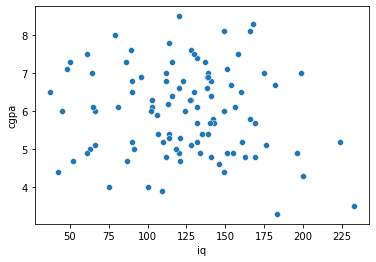

In [96]:
sns.scatterplot(x=df["iq"],y=df["cgpa"],data=df) #independent features

<AxesSubplot:xlabel='iq', ylabel='cgpa'>

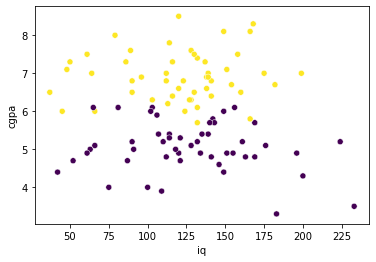

In [97]:
sns.scatterplot(x=df["iq"],y=df["cgpa"],data=df,c=df["placement"])
#Important insight through color difference

<AxesSubplot:xlabel='placement', ylabel='iq'>

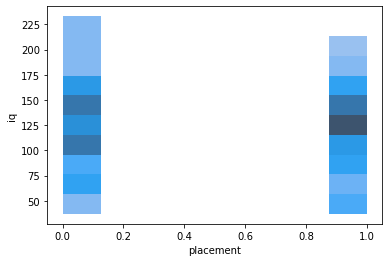

In [98]:
sns.histplot(x=df["placement"],y=df["iq"],data=df) #Relation b/w placement and iq

<AxesSubplot:xlabel='placement', ylabel='cgpa'>

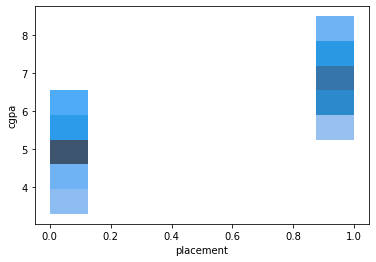

In [99]:
sns.histplot(x=df["placement"],y=df["cgpa"],data=df) #Relation b/w placement and cgpa

In [102]:
x=df.iloc[:,df.columns!="placement"]
y=df["placement"]

In [103]:
x.head()

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0


In [104]:
y.head()

0    1
1    0
2    0
3    1
4    0
Name: placement, dtype: int64

In [105]:
from sklearn.model_selection import train_test_split

In [106]:
trainX,testX,trainY,testY=train_test_split(x,y,test_size=0.1,random_state=42)

In [107]:
trainX.shape,testX.shape,trainY.shape,testY.shape 

((90, 2), (10, 2), (90,), (10,))

In [108]:
from sklearn.preprocessing import StandardScaler

In [109]:
scaler=StandardScaler()

In [110]:
trainX=scaler.fit_transform(trainX)

In [111]:
trainX

array([[-1.73718527, -0.62029848],
       [ 1.45537303,  0.09806189],
       [-0.9390457 , -1.62087186],
       [ 0.03645823,  0.63683217],
       [ 1.1893265 , -0.97947867],
       [-0.14090612,  0.45724208],
       [-0.9390457 ,  0.79076654],
       [ 1.1893265 , -1.90308486],
       [-0.49563482,  0.3802749 ],
       [-1.82586745, -0.38939693],
       [ 1.63273738, -0.26111829],
       [-1.38245657,  0.63683217],
       [ 0.92327998,  1.91961855],
       [ 1.45537303, -0.90251149],
       [ 2.2535126 , -0.10718393],
       [-0.76168135,  1.32953682],
       [-0.9390457 ,  0.25199626],
       [-1.38245657, -2.10833068],
       [-0.76168135, -1.49259322],
       [ 1.1893265 , -0.20980684],
       [ 0.8345978 ,  0.35461917],
       [-0.67299917,  0.9447009 ],
       [-0.14090612,  1.07297954],
       [-0.67299917, -0.87685576],
       [ 0.74591563, -0.31242975],
       [ 1.01196215, -1.95439632],
       [ 0.8345978 , -0.72292139],
       [ 1.8987839 ,  1.07297954],
       [ 0.74591563,

In [112]:
testX=scaler.transform(testX)

In [113]:
from sklearn.linear_model import LogisticRegression

In [114]:
model=LogisticRegression()

In [115]:
model.fit(trainX,trainY)

LogisticRegression()

In [117]:
predY=model.predict(testX)

In [125]:
from sklearn.metrics import accuracy_score, confusion_matrix,recall_score,f1_score

In [126]:
confusion_matrix(testY,predY)

array([[3, 0],
       [2, 5]], dtype=int64)

In [127]:
accuracy_score(testY,predY)

0.8

In [128]:
recall_score(testY,predY)

0.7142857142857143

In [129]:
f1_score(testY,predY)

0.8333333333333333

In [133]:
from mlxtend.plotting import plot_decision_regions

<AxesSubplot:>

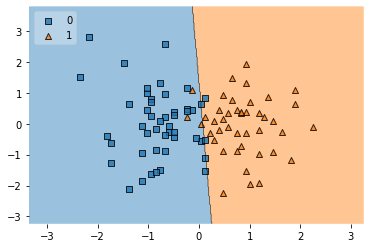

In [135]:
plot_decision_regions(trainX,trainY.values,clf=model,legend=2)

In [136]:
import pickle
pickle.dump(model,open('model.pkl','wb'))